In [146]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder,StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV

In [147]:
df=pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [149]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [150]:
df.columns = df.columns.str.strip()


In [151]:
col=["Life expectancy","Alcohol","Adult Mortality","Hepatitis B","BMI","Polio","Total expenditure","Diphtheria","GDP","Population","thinness  1-19 years","thinness 5-9 years","Income composition of resources","Schooling"]
for i in col:
    df[i]=df[i].fillna(df[i].mean())

In [152]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [153]:
df["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [154]:
label=LabelEncoder()
df["Status"]=label.fit_transform(df["Status"])
df["Country"]=label.fit_transform(df["Country"])

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   int64  
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   int64  
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [156]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [157]:
df.duplicated().sum()

np.int64(0)

In [158]:
df.drop(columns=["Country"],inplace=True)

<Axes: >

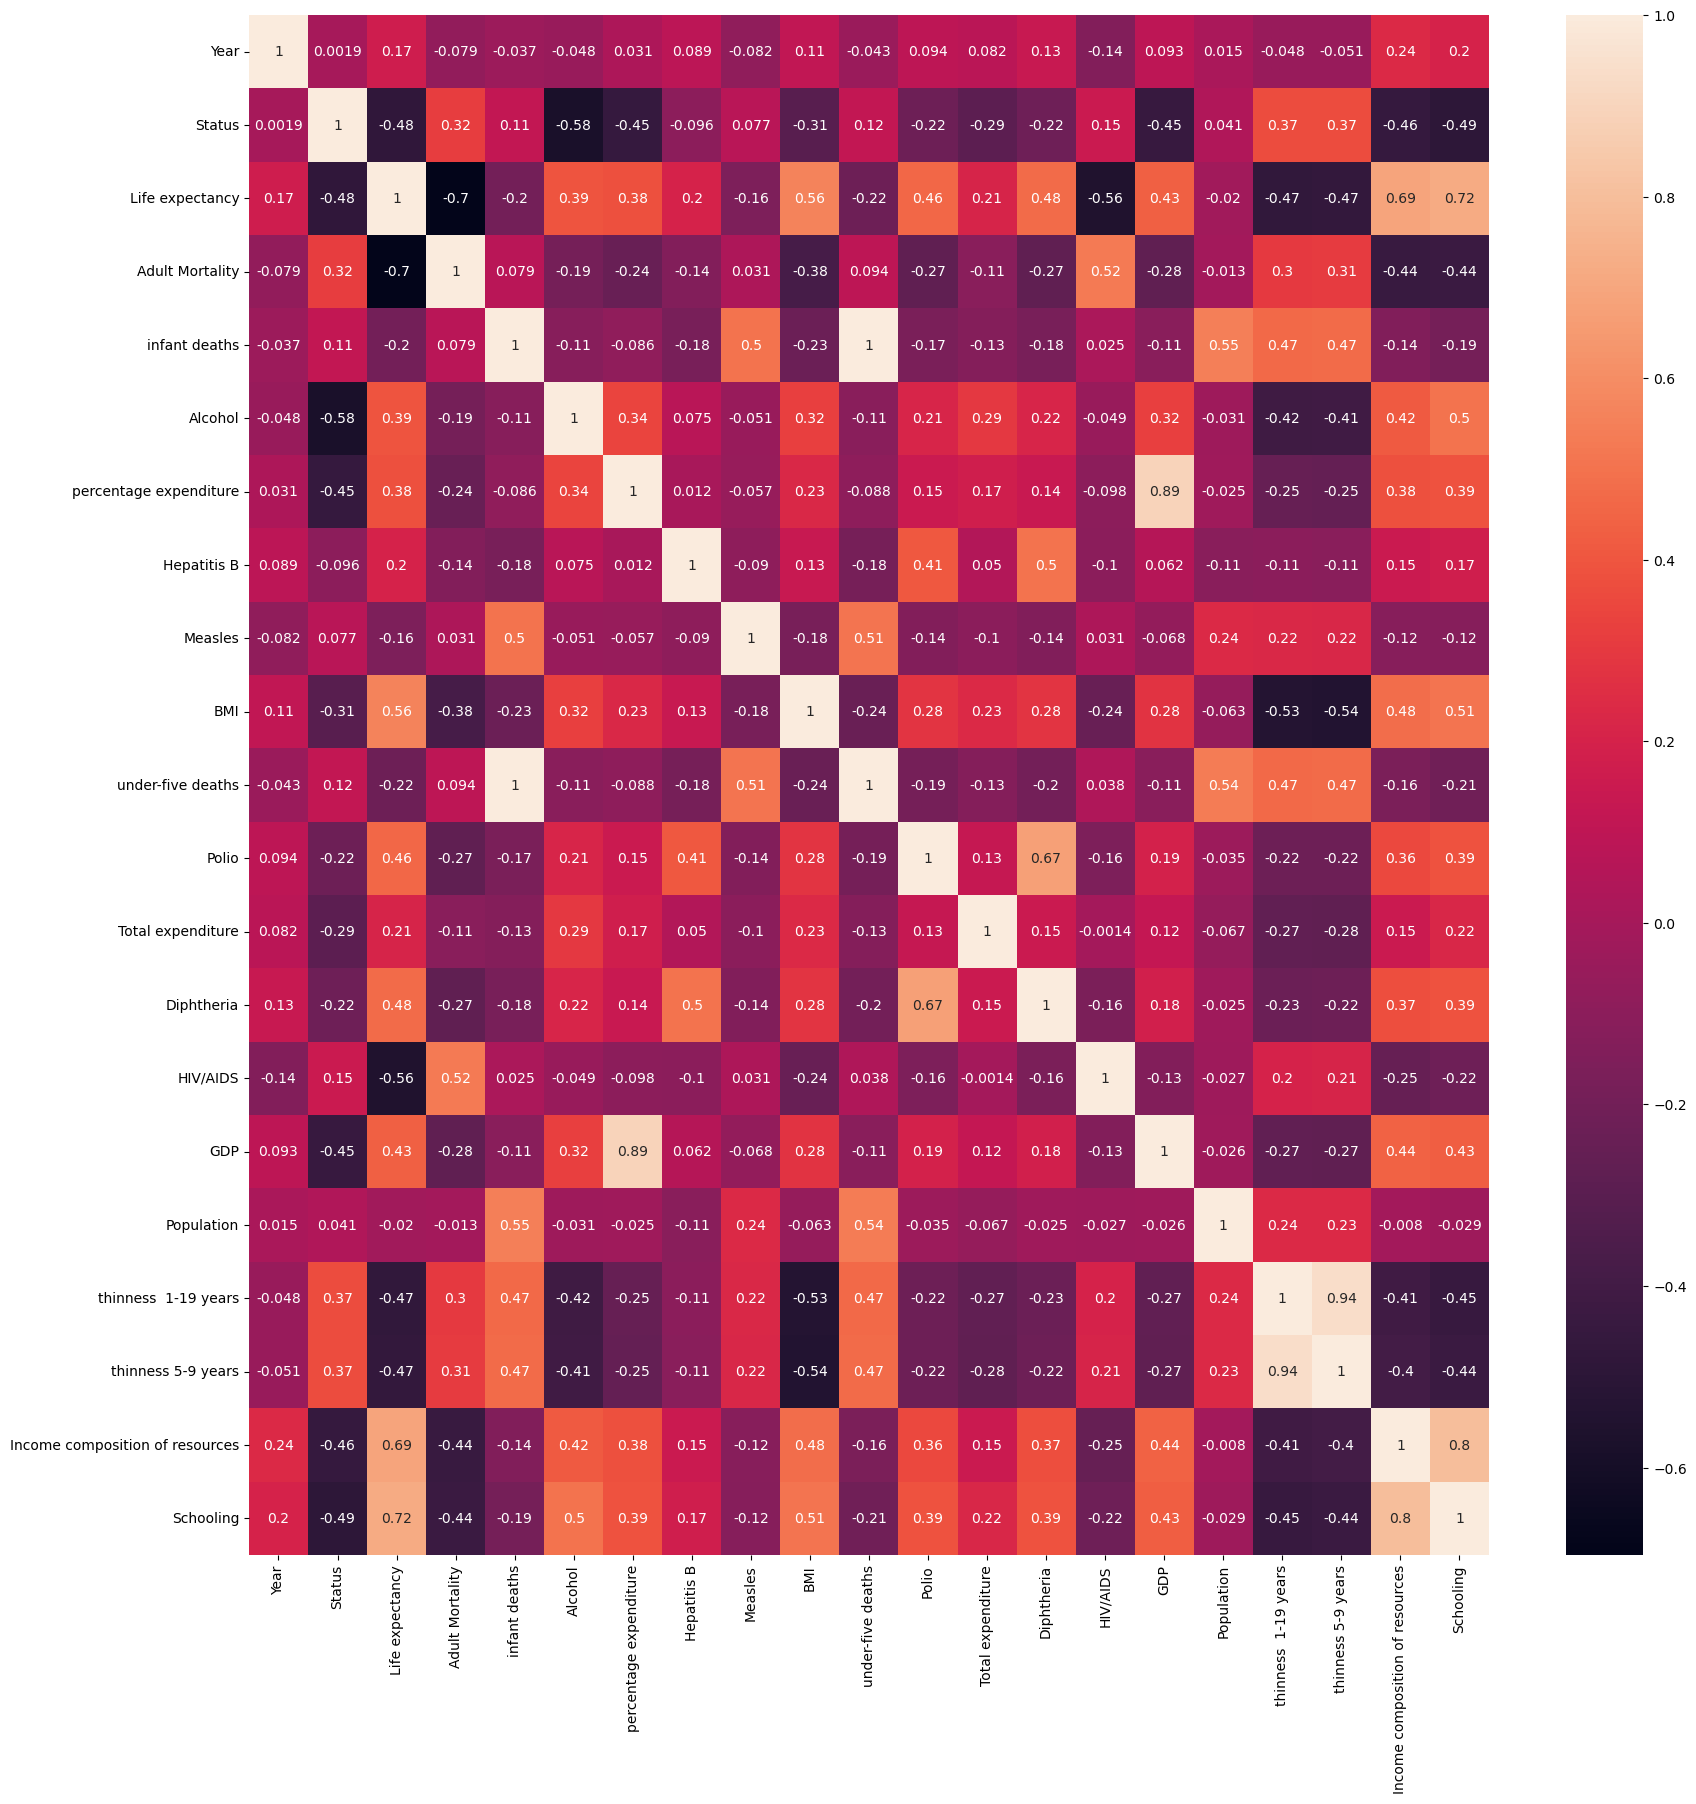

In [159]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [160]:
df.drop(columns=["percentage expenditure","thinness  1-19 years"],inplace=True)


In [161]:
df.columns

Index(['Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths',
       'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'Population', 'thinness 5-9 years', 'Income composition of resources',
       'Schooling'],
      dtype='object')

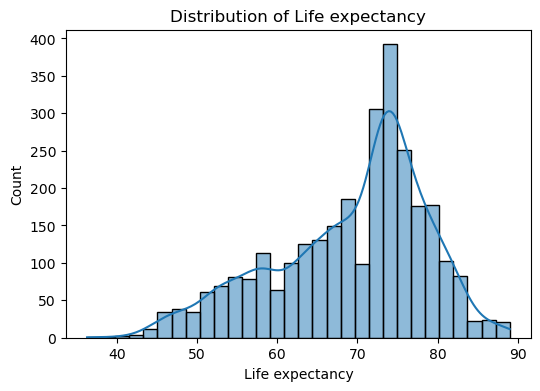

skewness: -0.6396932035944191


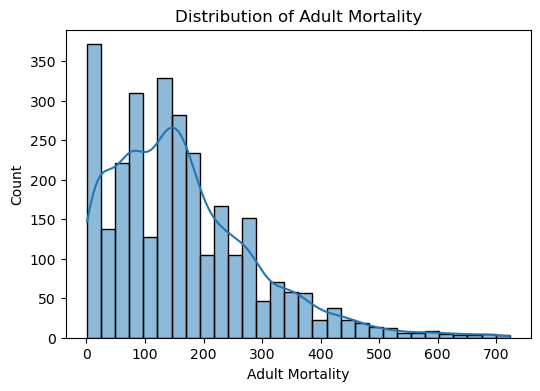

skewness: 1.1763711378603756


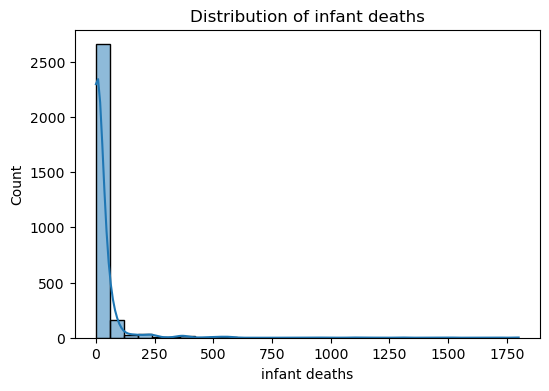

skewness: 9.786962950426057


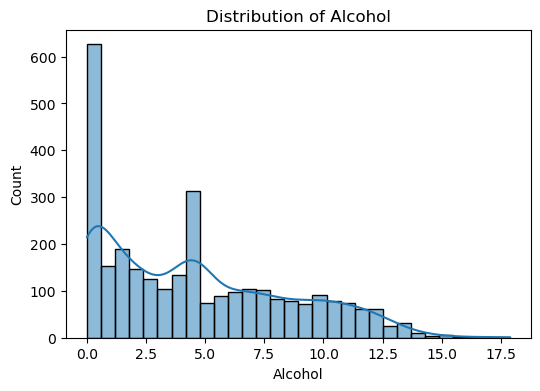

skewness: 0.6100255505917975


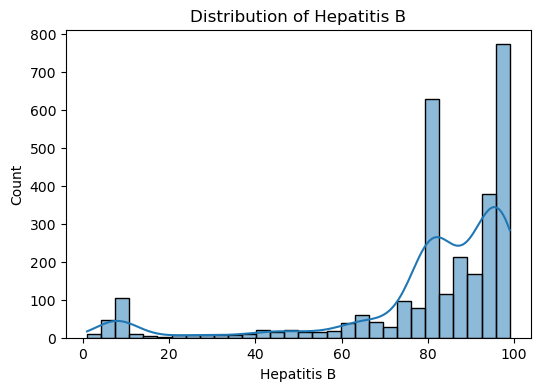

skewness: -2.1427804833251107


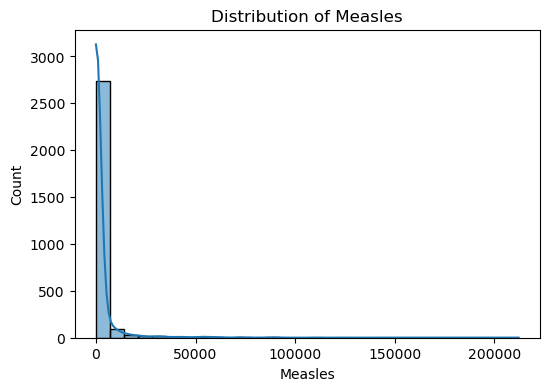

skewness: 9.441331947061583


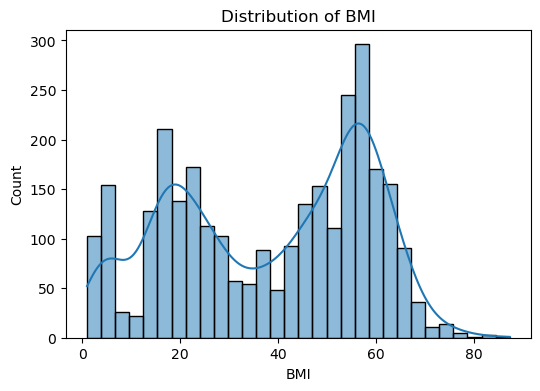

skewness: -0.220590396710427


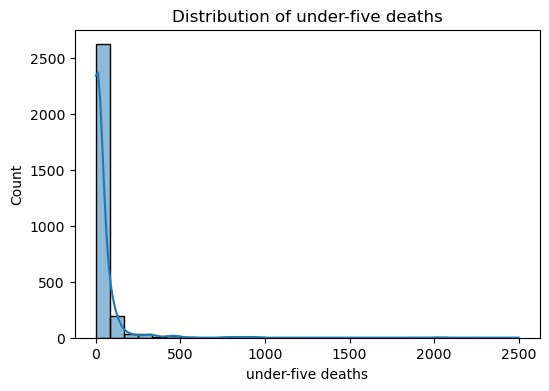

skewness: 9.495064656961773


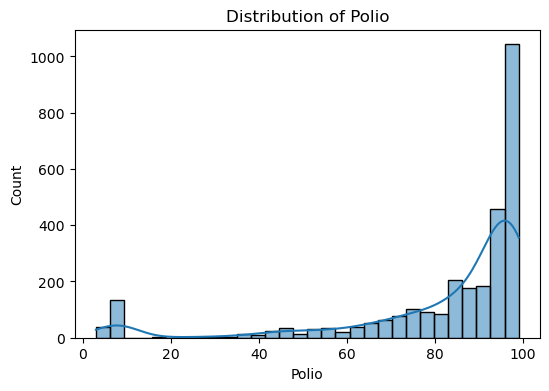

skewness: -2.10486336975713


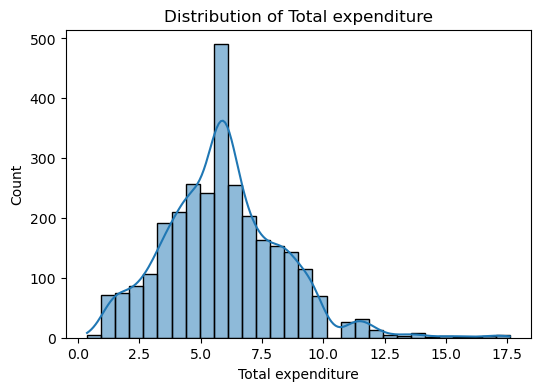

skewness: 0.643920919553821


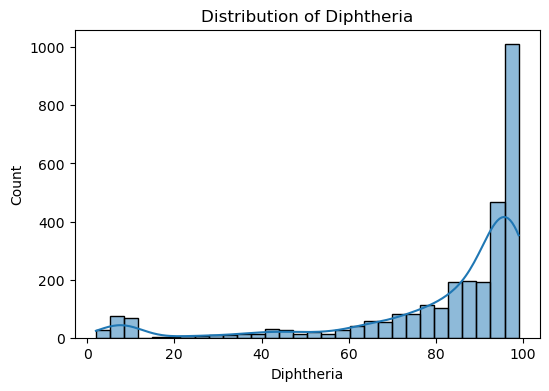

skewness: -2.079480927173293


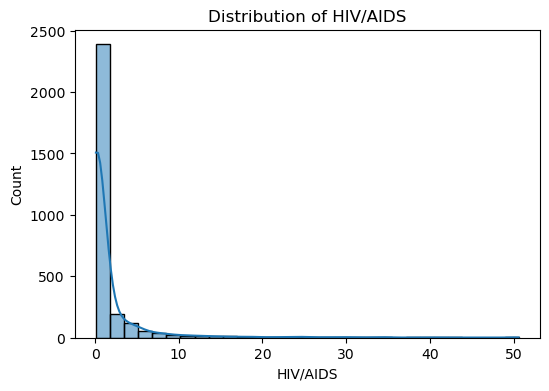

skewness: 5.396112042126371


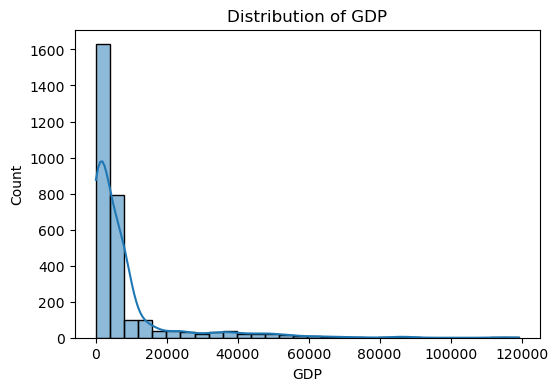

skewness: 3.4828800182869273


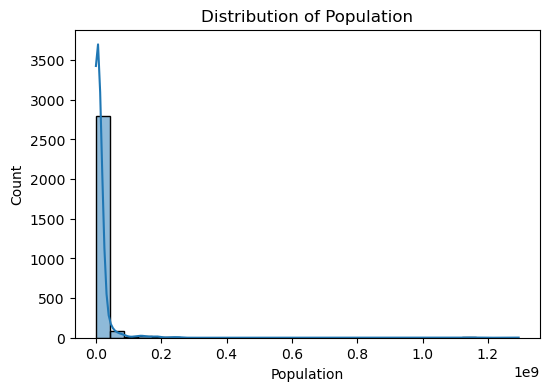

skewness: 18.04117602609601


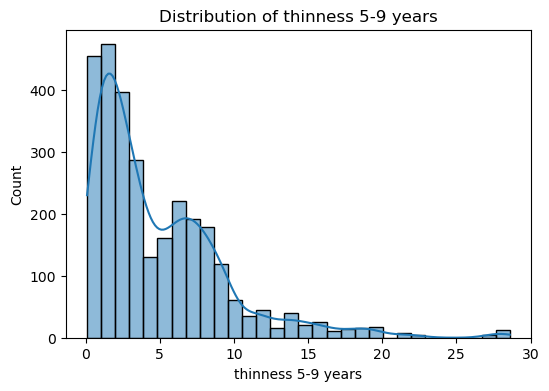

skewness: 1.7877880339128893


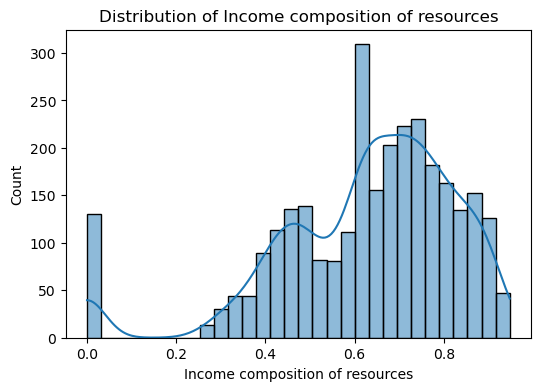

skewness: -1.1776878538184514


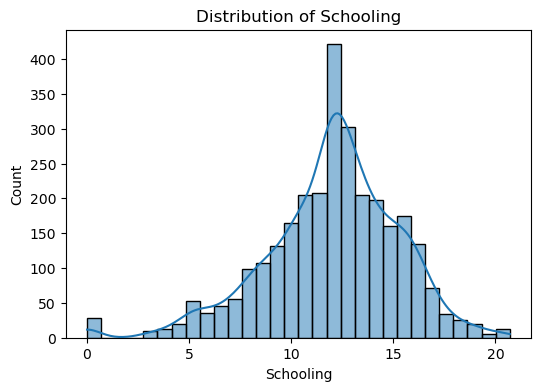

skewness: -0.6198586615017845


In [162]:
col=[ 'Life expectancy', 'Adult Mortality','infant deaths', 'Alcohol',  
     'Hepatitis B','Measles', 'BMI', 'under-five deaths', 'Polio', 
     'Total expenditure','Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
     'thinness 5-9 years', 'Income composition of resources', 'Schooling']

for i in col:
    plt.figure(figsize=(6,4))
    sns.histplot(df[i], kde=True, bins=30)
    plt.title(f"Distribution of {i}")
    plt.show()
    print("skewness:",df[i].skew())

In [163]:
df["Adult Mortality"]=np.sqrt(df["Adult Mortality"])
df["infant deaths"]=np.log1p(np.cbrt(df["infant deaths"]))
df["Measles"]=np.log1p(df["Measles"])
df["under-five deaths"]=np.log1p(df["under-five deaths"])
df["Polio"]=np.log1p(df["Polio"])
df["Diphtheria"]=np.log1p(df["Diphtheria"])
df["HIV/AIDS"]=np.log1p(df["HIV/AIDS"])
df["GDP"]=np.log1p(df["GDP"])
df["Population"]=np.log1p(df["Population"])


In [164]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [145]:
models={
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "RandomForestRegressor":RandomForestRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "KneighborsRegressor":KNeighborsRegressor(),
    "SVM Regressor":SVR(kernel="rbf"),
    "Adaboost":AdaBoostRegressor(),
    "gradientboost":GradientBoostingRegressor(),
    "xgboost":XGBRegressor()
}

In [144]:
param_grids = {
    "LinearRegression": {"fit_intercept": [True, False]},
    "Lasso": {"alpha": [0.01, 0.1, 1]},
    "Ridge": {"alpha": [0.01, 0.1, 1]},
    "RandomForestRegressor": {"n_estimators": [100, 200], "max_depth": [None, 10]},
    "DecisionTreeRegressor": {"max_depth": [None, 10], "min_samples_split": [2, 5]},
    "KneighborsRegressor": {"n_neighbors": [3, 5, 7]},
    "SVM Regressor": {"C": [0.1, 1, 10], "epsilon": [0.1, 0.2]},
    "Adaboost": {"n_estimators": [50, 100], "learning_rate": [0.1, 0.5]},
    "gradientboost": {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1]},
    "xgboost": {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1]}
}


In [165]:
x=df.drop(columns=["Life expectancy"])
y=df["Life expectancy"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [143]:
mse=[]
mae=[]
r2s=[]
adj_r2=[]
bestp=[]
n = x_test.shape[0]
p = x_train.shape[1]
for i,j in models.items():
    param_grid=param_grids[i]
    grid=GridSearchCV(j,cv=5,param_grid=param_grid,scoring="r2")
    grid.fit(x_train,y_train)
    best_param=grid.best_params_
    model=grid.best_estimator_
    y_pred=model.predict(x_test)
    r2=r2_score(y_test,y_pred)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mse.append(mean_squared_error(y_test,y_pred))
    mae.append(mean_absolute_error(y_test,y_pred))
    r2s.append(r2)
    adj_r2.append(adjusted_r2)
    bestp.append(best_param)


In [166]:
model_names = list(models.keys())
result = pd.DataFrame({
    "MSE": mse,
    "MAE": mae,
    "R2": r2s,
    "Adjusted_R2": adj_r2,
    "Best Param":bestp
}, index=model_names)
result["RMSE"]=np.sqrt(result["MSE"])

In [167]:
result.head(10)

,MSE,MAE,R2,Adjusted_R2,Best Param,RMSE
LinearRegression,13.374644,2.762756,0.845621,0.840738,{'fit_intercept': True},3.657136
Lasso,13.332792,2.757884,0.846104,0.841236,{'alpha': 0.01},3.651410
Ridge,13.370372,2.762486,0.845671,0.840788,{'alpha': 1},3.656552
RandomForestRegressor,2.736827,1.062732,0.968410,0.967410,"{'max_depth': None, 'n_estimators': 200}",1.654336
DecisionTreeRegressor,6.183924,1.640272,0.928621,0.926363,"{'max_depth': 10, 'min_samples_split': 2}",2.486750
KneighborsRegressor,6.770612,1.830970,0.921849,0.919377,{'n_neighbors': 5},2.602040
SVM Regressor,4.698180,1.365252,0.945771,0.944055,"{'C': 10, 'epsilon': 0.2}",2.167529
Adaboost,8.577021,2.358656,0.900999,0.897867,"{'learning_rate': 0.5, 'n_estimators': 100}",2.928655
gradientboost,3.644544,1.346797,0.957932,0.956602,"{'learning_rate': 0.1, 'n_estimators': 200}",1.909069
xgboost,2.689027,1.099067,0.968962,0.967980,"{'learning_rate': 0.1, 'n_estimators': 200}",1.639825


In [168]:
import pickle
with open("model.sav", "wb") as f:
    pickle.dump((model), f)
with open("model.sav", "rb") as f:
    loaded_model= pickle.load(f)